# Postcode data Preprocessing (not currently used!)

### The following sources have been used:

Postcode data: 

In [1]:
'''
RTA Postcode file creation

'''

import pandas as pd
import glob
import os
import time

print (os.getcwd())

start_time0 = time.time()
csv_loader = 'Specs/postcode_FLM.csv'
csv_files = 'Data/Postcodes/*.csv'
csv_out = 'Data/postcodes_all.csv'

#load field name mapper
pfl = pd.read_csv(csv_loader, low_memory=False)
pc_cols_rename = dict(pfl[['field_name','field_descriptor']].where(pfl['import']=='Y').dropna().values.tolist())
pc_cols_drop = pfl['field_name'].where(pfl['import']=='N').dropna().values.tolist()

#load and concaternate all postcode csv files
csv_files = glob.glob(csv_files)
frames = []
for csv_in in csv_files:
    df = pd.read_csv(csv_in, low_memory=False)
    frames.append(df)
postcodes = pd.concat(frames)

#clean up data
postcodes.drop(pc_cols_drop, axis=1, inplace=True)
postcodes.rename(columns=pc_cols_rename, inplace=True)
###postcodes.drop_duplicates()
###postcodes.info()

#save for later
try:
    postcodes.to_csv(csv_out, index=False)
except IOError as (errno, strerror):
    print 'I/O error({0}): {1}'.format(errno, strerror)
    if errno == 13:
        print '*** check to see if (someone has) file already open ***'
except:
    print "Unexpected error:", sys.exc_info()[0]
    raise

print "Postcode dataload: %s seconds " % (time.time() - start_time0)

C:\GA\RTA
Postcode dataload: 73.0179998875 seconds 


In [2]:
'''
RTA Postcode file loader

'''
import pandas as pd
import glob
import os
import time

csv_in = '../Road_safety/postcodes_all.csv'

postcodes = pd.read_csv(csv_in, low_memory=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593612 entries, 0 to 2593611
Data columns (total 21 columns):
postcode                         object
Date_of_introduction             int64
Date_of_termination              float64
County                           object
Local_authority_district         object
ward/division                    object
Postcode_user_type               int64
National_grid_Easting            float64
National_grid_Northing           float64
Grid_quality_indicator           int64
Country                          object
Statistical_Region               object
Travel_to_Work_Area              object
Census_Area_Statistics_ward      object
National_park                    object
Built-up_Area                    object
Built-up_Area_Sub-division       object
latitude                         float64
longitude                        float64
Police_Force_Area                object
Index_of_Multiple_Deprivation    int64
dtypes: float64(5), int64(4), object(12)
memor

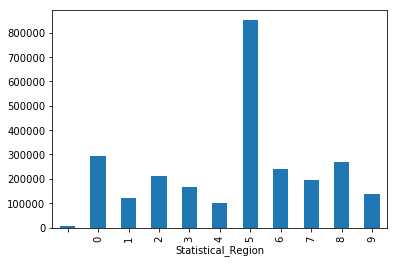

In [3]:
'''
RTA Postcode check data

'''
import matplotlib.pyplot as plt
%matplotlib inline

print(postcodes.info())
col = 'Statistical_Region'
postcodes.groupby([col])[col].count().plot(kind='bar')
plt.show()

In [4]:
NE = 'National_grid_Easting'
NN = 'National_grid_Northing'
LA = 'latitude'
LO = 'longitude'
#where(postcodes[NE == 525130 and NN == 180050]))
#df[df['first_name'].notnull() & (df['nationality'] == "USA")]
#df['preTestScore'].where(df['postTestScore'] > 50)

#print(postcodes[['postcode',LA,LO,NE,NN]].where(postcodes[NN] == 180069).dropna())
print(postcodes.loc(['postcode'])[(postcodes['postcode'] == ('W8  7EJ'))])



        postcode  Date_of_introduction  Date_of_termination     County  \
2441890  W8  7EJ                198001                  NaN  E99999999   

        Local_authority_district ward/division  Postcode_user_type  \
2441890                E09000020     E05009390                   0   

         National_grid_Easting  National_grid_Northing  \
2441890               525130.0                180069.0   

         Grid_quality_indicator              ...               \
2441890                       1              ...                

        Statistical_Region Travel_to_Work_Area Census_Area_Statistics_ward  \
2441890                  5           E30000234                      00AWGA   

        National_park Built-up_Area Built-up_Area_Sub-division   latitude  \
2441890     E99999999     E34004707                  E35000074  51.505709   

         longitude  Police_Force_Area Index_of_Multiple_Deprivation  
2441890  -0.198458          E23000001                         22636  

[1 rows x